### Gustavos Method

In [6]:
# we use the 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\martin.szigeti\Documents\GitHub\DSV\Data\Albania42var_processed_DHS.csv")


<AxesSubplot:ylabel='Frequency'>

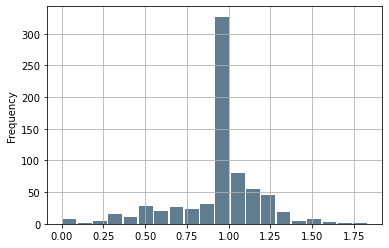

In [7]:
df["Getting medical help for self: concern that there may be no supplies or equipmen"].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

In [ ]:
df.describe().T

## Step 4: Standardize the input variables using z‐score standardization

In [16]:
# Z-score
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler()

In [20]:
def zscoring(DF):
    DF_zscore = pd.DataFrame(zscore.fit_transform(DF), columns=DF.columns)
    DF_zscore.set_index(DF.index, inplace=True)
    return DF_zscore

In [39]:
df_z = zscoring(df.iloc[:,1:8])
print(df.shape)
print(df.shape)
df_z.head(5)

(713, 43)
(713, 43)


,Respondent's current age,NA - Cluster altitude in meters,Years lived in place of residence,Highest educational level,Household has: radio,Time to get to water source,Education in single years
0,-0.249040,-0.640450,-0.299084,1.040412,-1.171444,-0.159773,0.949477
1,0.686028,-0.640450,-0.953764,0.009248,-1.171444,-0.455526,0.218621
2,1.583401,-0.637096,0.424948,0.918446,-1.171444,-0.455526,1.064325
3,0.302327,-0.640450,-0.514035,0.132446,-1.171444,-0.236450,0.353965
4,1.099452,-0.600211,0.757168,2.005049,-1.171444,-0.455526,1.784740


## Step 5: Perform PCA using a varimax rotation (100 iterations) and Kaiser criterion (100 iterations) for component selection.

In [41]:
import sys
sys.path.insert(0, r'C:\Users\martin.szigeti\Documents\GitHub\DSV\Utils')
from spss_pca import SPSS_PCA

#### Now we do it with the z_score table and then without - since the SPSS function z-transforms the values anyways (it shouldnt make a difference)

In [43]:
df_z_pca = SPSS_PCA(df_z, reduce=True, varimax=True)
print(df_z_pca.z_inputs.shape)
df_z_pca.z_inputs[0]

(713, 7)


array([-0.2490397 , -0.64044968, -0.29908366,  1.040412  , -1.17144445,
       -0.15977282,  0.94947672])

In [62]:
df_pca = SPSS_PCA(df, reduce=True, varimax=True)
print(df_pca.z_inputs.shape)
df_pca.z_inputs[0]

(713, 43)


array([-1.7283475 , -0.2490397 , -0.64044968, -0.29908366,  1.040412  ,
       -1.17144445, -0.15977282,  0.94947672, -0.33444788, -0.31675089,
       -0.36679439,  0.29788757,  1.25930575,  0.10811222,  0.54570004,
        1.05243275,  1.69137148,  0.24729026,  0.76118647, -1.02324655,
        0.06437992, -1.0648185 ,  0.0964517 ,  0.77407162,  1.12197626,
        0.28137911, -0.5649373 , -0.57515034, -1.26885175, -1.24611855,
        0.07434428, -0.64449545,  0.30045295, -0.00437998, -0.01129813,
        0.9383958 ,  0.57350971, -0.50636318, -0.58190382, -0.43519353,
       -0.32307671, -0.28063118, -0.45189061])

In [68]:
df_pca.__dict__

{'z_inputs': array([[-1.7283475 , -0.2490397 , -0.64044968, ..., -0.32307671,
         -0.28063118, -0.45189061],
        [-1.72350017,  0.68602772, -0.64044968, ..., -0.32307671,
         -0.28063118,  2.10284984],
        [-1.71865284,  1.5834006 , -0.63709647, ..., -0.32307671,
         -0.28063118, -0.45189061],
        ...,
        [ 1.72294949,  1.23563821, -0.66392218, ..., -0.32307671,
         -0.28063118, -0.45189061],
        [ 1.72779682,  0.73722571, -0.02010517, ...,  1.58393689,
          1.85939902,  1.02716965],
        [ 1.73264415, -0.06178303, -0.6203304 , ..., -0.32307671,
         -0.28063118, -0.45189061]]),
 'scores': array([[-0.90419868, -0.10687974,  0.3291968 , ...,  0.8543723 ,
          0.39390528,  0.84341247],
        [-0.74071975, -0.02859253,  0.87621561, ..., -0.44884331,
         -0.53389662, -0.468826  ],
        [-1.06146603,  0.47838727,  0.9657948 , ..., -0.32614798,
          1.23722776, -0.26377755],
        ...,
        [-0.13626394, -1.1192472

### OK good ; they are equal...

Lets move on

## Step 6: Examine the resulting factors & Step 7: Directional adjustment (or cardinality)

In [50]:
def loadings_analysis(df_pca, df_orig, country, comp_idx):
    ssl = df_pca.sum_sq_load_rot
    print('For {} dataset PCA with varimax rotation and Kaiser criterion used {} variables and produced {} factors'.format(country,df_pca.comp_mat_rot.shape[0], df_pca.comp_mat_rot.shape[1]))
    print('Component {} explained variance {:.2f}'.format(comp_idx+1, ssl[comp_idx]/ssl.sum()*100))
    for i, c in enumerate(df_orig.columns):
        print ('#', i, '-', c, ': ', df_pca.comp_mat_rot[i, comp_idx])

In [66]:
# Variable overall contribution (loadings sum)
var_importance = df_pca.comp_mat_rot.sum(1)
for i, c in enumerate(df.iloc[:,1:].columns):
    print ('#',i, '-', c, ': ', var_importance[i])

# 0 - Respondent's current age :  0.9822426108607119
# 1 - NA - Cluster altitude in meters :  -0.3973100134728549
# 2 - Years lived in place of residence :  0.97620754153754
# 3 - Highest educational level :  0.6680848262667268
# 4 - Household has: radio :  0.6285118303014148
# 5 - Time to get to water source :  1.1860574345128916
# 6 - Education in single years :  -0.4158475431667872
# 7 - Main floor material :  0.545609507940502
# 8 - Main roof material :  1.1297670931782058
# 9 - Main wall material :  0.48737546547765886
# 10 - Number of household members (listed) :  0.9100232590865337
# 11 - Number of children 5 and under in household (de jure) :  0.9714393613286145
# 12 - Number of eligible women in household (de facto) :  0.11342818394812637
# 13 - Sex of household head :  0.9025940273395028
# 14 - Age of household head :  -0.9540430535642106
# 15 - Household has: telephone (land-line) :  0.7203870809829006
# 16 - Literacy :  0.7449726785284139
# 17 - Frequency of reading newspap

In [59]:
loadings_analysis(df_pca, df.iloc[:,1:8], 'Analysis 1', 0)

For Analysis 1 dataset PCA with varimax rotation and Kaiser criterion used 7 variables and produced 3 factors
component 1 explained variance 46.26
# 0 - Respondent's current age :  -0.016556566833121733
# 1 - NA - Cluster altitude in meters :  -0.28160314511744955
# 2 - Years lived in place of residence :  0.13339981193176262
# 3 - Highest educational level :  0.976120454403851
# 4 - Household has: radio :  0.2516631130320642
# 5 - Time to get to water source :  -0.2249049687411585
# 6 - Education in single years :  0.9695110381172832


In [60]:
loadings_analysis(df_pca, df.iloc[:,1:8], 'Analysis 1', 1)

For Analysis 1 dataset PCA with varimax rotation and Kaiser criterion used 7 variables and produced 3 factors
component 2 explained variance 30.94
# 0 - Respondent's current age :  0.044670665492758534
# 1 - NA - Cluster altitude in meters :  0.7059273513738057
# 2 - Years lived in place of residence :  0.6908755162225282
# 3 - Highest educational level :  -0.0020505383680464967
# 4 - Household has: radio :  0.06972595075166614
# 5 - Time to get to water source :  -0.6515858918975506
# 6 - Education in single years :  -0.016674230314924123


In [61]:
loadings_analysis(df_pca, df.iloc[:,1:8], 'Analysis 1', 2)

For Analysis 1 dataset PCA with varimax rotation and Kaiser criterion used 7 variables and produced 3 factors
component 3 explained variance 22.80
# 0 - Respondent's current age :  0.9736075217596569
# 1 - NA - Cluster altitude in meters :  -0.20309849646441253
# 2 - Years lived in place of residence :  0.20884174724537158
# 3 - Highest educational level :  -0.011455004658714173
# 4 - Household has: radio :  -0.006515448929777126
# 5 - Time to get to water source :  -0.018987668182974364
# 6 - Education in single years :  0.05925295041018721
